In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013-cleaned - 13tbl8ny.csv')

In [3]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0.0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0.0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8.0,NaN,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0.0,NaN,3,4,16,223,53,165,5,NaN


Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$
 
The 'population' variable is already set for you, but you will need to create the last three features. Robbery and Murder are currently continuous variables. For this model, please use these variables to create categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0. You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready. Don't forget basic data cleaning procedures, either! Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.

In [4]:
list(df)

['City',
 'Population',
 'Violent\ncrime',
 'Murder and\nnonnegligent\nmanslaughter',
 'Rape\n(revised\ndefinition)1',
 'Rape\n(legacy\ndefinition)2',
 'Robbery',
 'Aggravated\nassault',
 'Property\ncrime',
 'Burglary',
 'Larceny-\ntheft',
 'Motor\nvehicle\ntheft',
 'Arson3']

In [5]:
# Make new column 
df['Robbery_2'] = np.where(df['Robbery'] == 0, 0, 1)

In [6]:
df['Murder and\nnonnegligent\nmanslaughter_2'] = np.where(df['Murder and\nnonnegligent\nmanslaughter'] > 0, 1, 0)

In [7]:
df['Population'] = df['Population'].str.replace(',', '').astype(float)

In [8]:
df['Population_2'] = df['Population'] **2

In [9]:
df['Property\ncrime'] = df['Property\ncrime'].str.replace(',', '').astype(float)

In [10]:
list(df)

['City',
 'Population',
 'Violent\ncrime',
 'Murder and\nnonnegligent\nmanslaughter',
 'Rape\n(revised\ndefinition)1',
 'Rape\n(legacy\ndefinition)2',
 'Robbery',
 'Aggravated\nassault',
 'Property\ncrime',
 'Burglary',
 'Larceny-\ntheft',
 'Motor\nvehicle\ntheft',
 'Arson3',
 'Robbery_2',
 'Murder and\nnonnegligent\nmanslaughter_2',
 'Population_2']

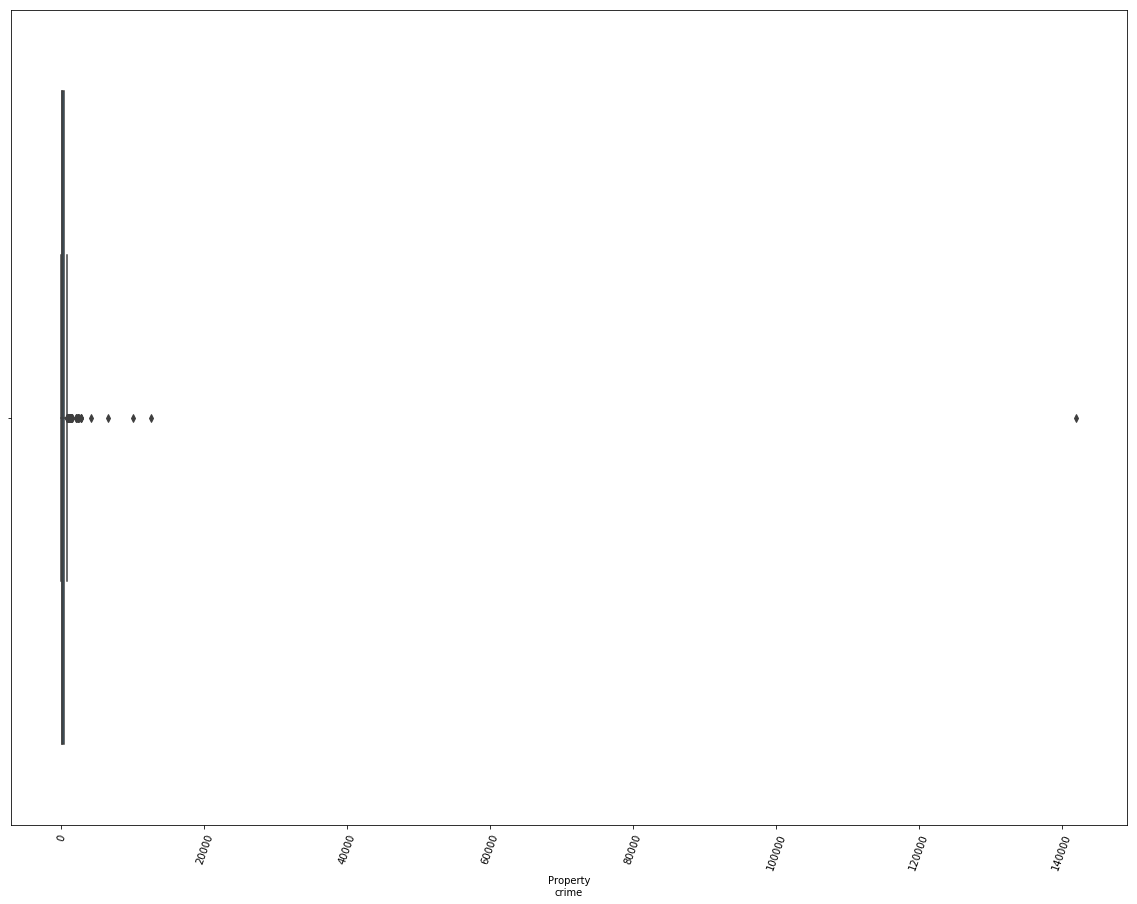

In [11]:
plt.figure(figsize=(20,15))
sns.boxplot(x="Property\ncrime", data=df)
plt.xticks(rotation=70)
plt.show()

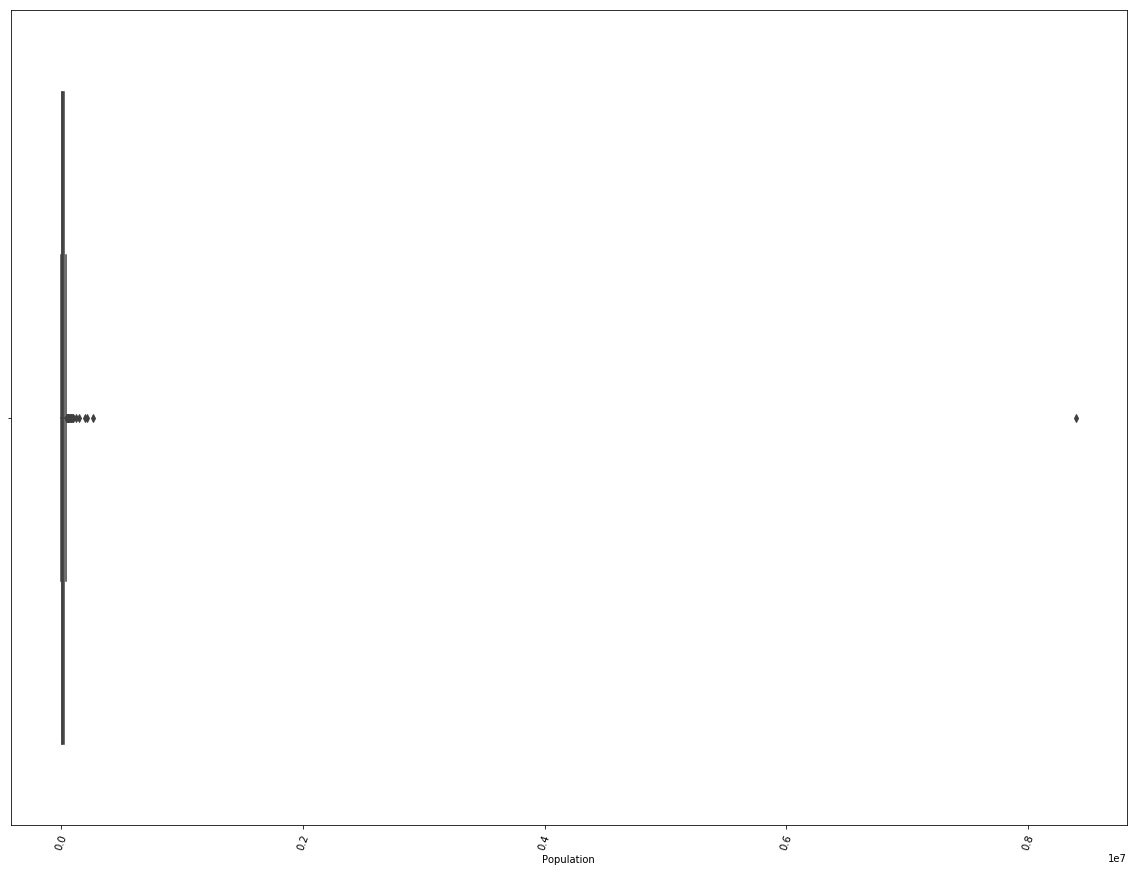

In [12]:
plt.figure(figsize=(20,15))
sns.boxplot(x="Population", data=df)
plt.xticks(rotation=70)
plt.show()

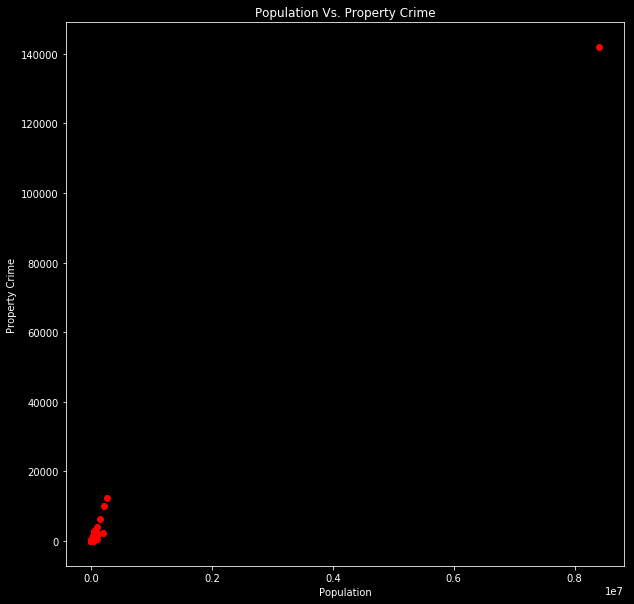

In [13]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,10))
    plt.scatter(x=df['Population'], y = df['Property\ncrime'], color = 'red' )
    plt.xlabel('Population')
    plt.ylabel('Property Crime')
    plt.title('Population Vs. Property Crime')
    plt.show()

In [14]:
#drop the outlier

In [15]:
# remove values over 120000 in Property Crime
df = df[df['Property\ncrime'] < 120000]

In [16]:
df['Property\ncrime'].max()

12491.0

In [17]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Robbery_2,Murder and nonnegligent manslaughter_2,Population_2
0,Adams Village,1861.0,0,0.0,NaN,0,0,0,12.0,2,10,0,0.0,1,0,3.463321e+06
1,Addison Town and Village,2577.0,3,0.0,NaN,0,0,3,24.0,3,20,1,0.0,1,0,6.640929e+06
2,Akron Village,2846.0,3,0.0,NaN,0,0,3,16.0,1,15,0,0.0,1,0,8.099716e+06
3,Albany,97956.0,791,8.0,NaN,30,227,526,4090.0,705,"3,243",142,NaN,1,1,9.595378e+09
4,Albion Village,6388.0,23,0.0,NaN,3,4,16,223.0,53,165,5,NaN,1,0,4.080654e+07


In [18]:
df.dtypes

City                                         object
Population                                  float64
Violent\ncrime                               object
Murder and\nnonnegligent\nmanslaughter      float64
Rape\n(revised\ndefinition)1                float64
Rape\n(legacy\ndefinition)2                  object
Robbery                                      object
Aggravated\nassault                          object
Property\ncrime                             float64
Burglary                                     object
Larceny-\ntheft                              object
Motor\nvehicle\ntheft                        object
Arson3                                      float64
Robbery_2                                     int64
Murder and\nnonnegligent\nmanslaughter_2      int64
Population_2                                float64
dtype: object

In [19]:
df.isnull().sum()

City                                          0
Population                                    0
Violent\ncrime                                0
Murder and\nnonnegligent\nmanslaughter        0
Rape\n(revised\ndefinition)1                347
Rape\n(legacy\ndefinition)2                   0
Robbery                                       0
Aggravated\nassault                           0
Property\ncrime                               0
Burglary                                      0
Larceny-\ntheft                               0
Motor\nvehicle\ntheft                         0
Arson3                                      160
Robbery_2                                     0
Murder and\nnonnegligent\nmanslaughter_2      0
Population_2                                  0
dtype: int64

In [20]:
df['Violent\ncrime'] = df['Violent\ncrime'].str.replace(",", "").astype(float)

In [21]:
df['Rape\n(legacy\ndefinition)2'] = df['Rape\n(legacy\ndefinition)2'].str.replace(",", "").astype(float)

In [22]:
df['Robbery'] = df['Robbery'].str.replace(",", "").astype(float)

In [23]:
df['Aggravated\nassault'] = df['Aggravated\nassault'].str.replace(",", "").astype(float)

In [24]:
df['Burglary'] = df['Burglary'].str.replace(",", "").astype(float)

In [25]:
df['Larceny-\ntheft'] = df['Larceny-\ntheft'].str.replace(",", "").astype(float)

In [26]:
df['Motor\nvehicle\ntheft'] = df['Motor\nvehicle\ntheft'].str.replace(",", "").astype(float)

In [27]:
df.dtypes

City                                         object
Population                                  float64
Violent\ncrime                              float64
Murder and\nnonnegligent\nmanslaughter      float64
Rape\n(revised\ndefinition)1                float64
Rape\n(legacy\ndefinition)2                 float64
Robbery                                     float64
Aggravated\nassault                         float64
Property\ncrime                             float64
Burglary                                    float64
Larceny-\ntheft                             float64
Motor\nvehicle\ntheft                       float64
Arson3                                      float64
Robbery_2                                     int64
Murder and\nnonnegligent\nmanslaughter_2      int64
Population_2                                float64
dtype: object

In [28]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['Property\ncrime'].values.reshape(-1, 1)
X = df[['Violent\ncrime','Rape\n(legacy\ndefinition)2','Aggravated\nassault',
        'Burglary','Larceny-\ntheft','Motor\nvehicle\ntheft', 'Robbery_2',
        'Murder and\nnonnegligent\nmanslaughter_2','Population_2']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 1.53210777e-14 -2.63504496e-14 -2.43971510e-14  1.00000000e+00
   1.00000000e+00  1.00000000e+00 -1.30521124e-17 -1.57894531e-14
  -1.54657628e-18]]

Intercept: 
 [1.52471102e-09]

R-squared:
1.0


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [29]:
# These features explain 100% of variance in property crime, but is a cause for concern.
# 1.0's are a good candidate to remove because they are not providing value to algorithm.

In [30]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['Property\ncrime'].values.reshape(-1, 1)
X = df[['Violent\ncrime','Rape\n(legacy\ndefinition)2','Aggravated\nassault','Robbery_2',
        'Murder and\nnonnegligent\nmanslaughter_2','Population_2']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 2.60833303e-01  5.38779199e+01  1.34408884e+00 -1.01960282e-12
   2.01024601e+02  3.32315981e-08]]

Intercept: 
 [127.17388918]

R-squared:
0.9200884704153107


# California Data

In [31]:
df_ca = pd.read_csv('table_8_offenses_known_to_law_enforcement_california_by_city_2013 - 13tbl8ca.csv')

In [32]:
df_ca.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
0,Adelanto,"31,165",198,2.0,NaN,15.0,52,129,886,381,372,133,17
1,Agoura Hills,"20,762",19,0.0,NaN,2.0,10,7,306,109,185,12,7
2,Alameda,"76,206",158,0.0,NaN,10.0,85,63,"1,902",287,"1,285",330,17
3,Albany,"19,104",29,0.0,NaN,1.0,24,4,557,94,388,75,7
4,Alhambra,"84,710",163,1.0,NaN,9.0,81,72,"1,774",344,"1,196",234,7


In [33]:
# make sure columns are named the same as other data set and use the same columns

In [34]:
df_ca.dtypes

City                                       object
Population                                 object
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2               float64
Robbery                                    object
Aggravated\nassault                        object
Property\ncrime                            object
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson                                      object
dtype: object

In [35]:
# use New York model on CA data

In [36]:
# Make new column 
df_ca['Robbery_2'] = np.where(df_ca['Robbery'] == 0, 0, 1)

In [37]:
df_ca['Murder and\nnonnegligent\nmanslaughter_2'] = np.where(df_ca['Murder and\nnonnegligent\nmanslaughter'] > 0, 1, 0)

In [38]:
df_ca['Population'] = df_ca['Population'].str.replace(',', '').astype(float)

In [39]:
df_ca['Population_2'] = df_ca['Population'] **2

In [40]:
df_ca['Property\ncrime'] = df_ca['Property\ncrime'].str.replace(',', '').astype(float)

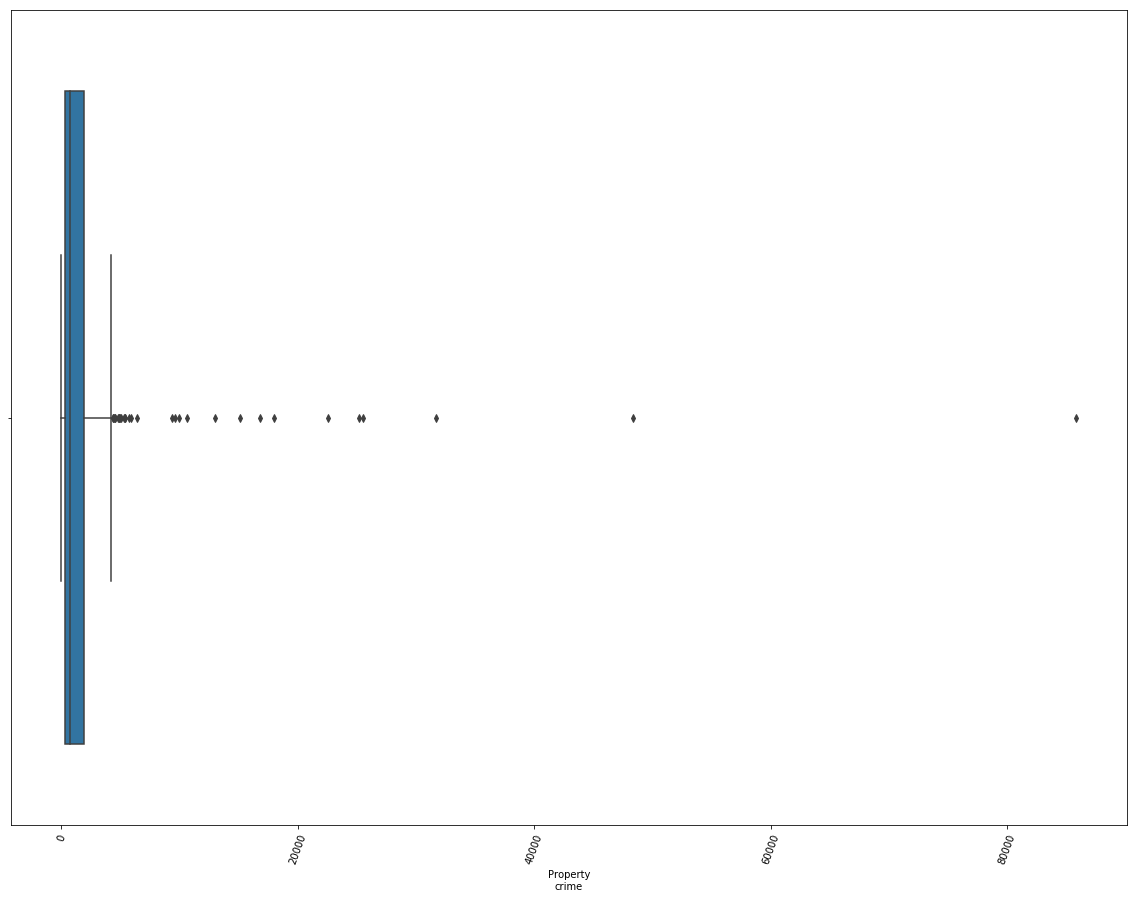

In [41]:
plt.figure(figsize=(20,15))
sns.boxplot(x="Property\ncrime", data=df_ca)
plt.xticks(rotation=70)
plt.show()

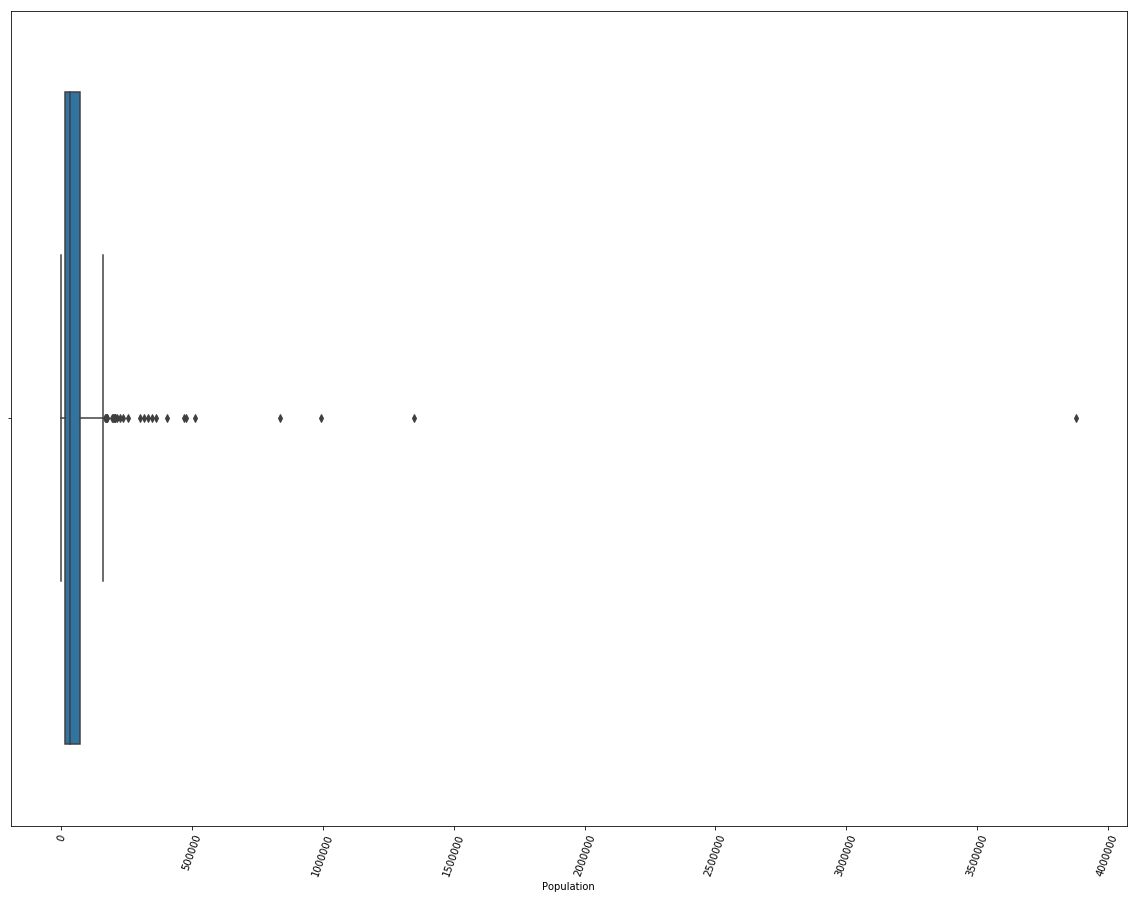

In [42]:
plt.figure(figsize=(20,15))
sns.boxplot(x="Population", data=df_ca)
plt.xticks(rotation=70)
plt.show()

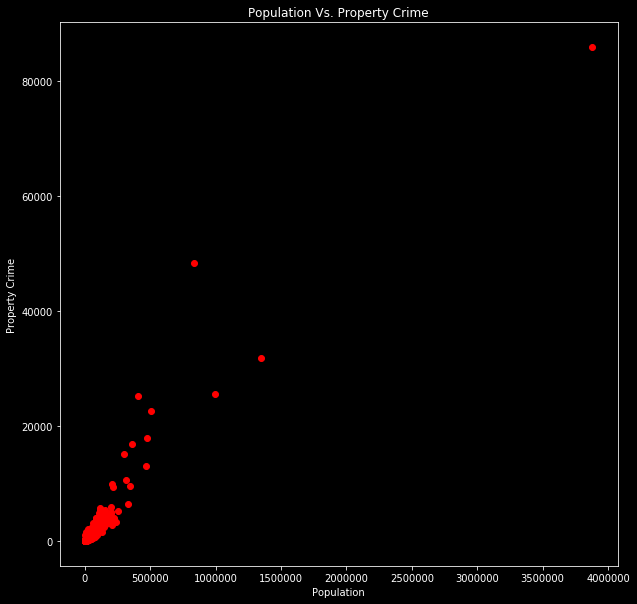

In [43]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,10))
    plt.scatter(x=df_ca['Population'], y = df_ca['Property\ncrime'], color = 'red' )
    plt.xlabel('Population')
    plt.ylabel('Property Crime')
    plt.title('Population Vs. Property Crime')
    plt.show()

In [44]:
# remove values over 120000 in Property Crime
df_ca = df_ca[df_ca['Property\ncrime'] < 80000]

In [45]:
df_ca['Property\ncrime'].max()

48324.0

In [46]:
df_ca.dtypes

City                                         object
Population                                  float64
Violent\ncrime                               object
Murder and\nnonnegligent\nmanslaughter      float64
Rape\n(revised\ndefinition)1                float64
Rape\n(legacy\ndefinition)2                 float64
Robbery                                      object
Aggravated\nassault                          object
Property\ncrime                             float64
Burglary                                     object
Larceny-\ntheft                              object
Motor\nvehicle\ntheft                        object
Arson                                        object
Robbery_2                                     int64
Murder and\nnonnegligent\nmanslaughter_2      int64
Population_2                                float64
dtype: object

In [47]:
df_ca.isnull().sum()

City                                          0
Population                                    0
Violent\ncrime                                0
Murder and\nnonnegligent\nmanslaughter        0
Rape\n(revised\ndefinition)1                461
Rape\n(legacy\ndefinition)2                   0
Robbery                                       0
Aggravated\nassault                           0
Property\ncrime                               0
Burglary                                      0
Larceny-\ntheft                               0
Motor\nvehicle\ntheft                         0
Arson                                         0
Robbery_2                                     0
Murder and\nnonnegligent\nmanslaughter_2      0
Population_2                                  0
dtype: int64

In [48]:
df_ca['Violent\ncrime'] = df_ca['Violent\ncrime'].str.replace(",", "").astype(float)

In [49]:
# rape 2 is already float

In [50]:
df_ca['Robbery'] = df_ca['Robbery'].str.replace(",", "").astype(float)

In [51]:
df_ca['Aggravated\nassault'] = df_ca['Aggravated\nassault'].str.replace(",", "").astype(float)

In [52]:
df_ca['Burglary'] = df_ca['Burglary'].str.replace(",", "").astype(float)

In [53]:
df_ca['Larceny-\ntheft'] = df_ca['Larceny-\ntheft'].str.replace(",", "").astype(float)

In [54]:
df_ca['Motor\nvehicle\ntheft'] = df_ca['Motor\nvehicle\ntheft'].str.replace(",", "").astype(float)

In [55]:
df_ca.dtypes

City                                         object
Population                                  float64
Violent\ncrime                              float64
Murder and\nnonnegligent\nmanslaughter      float64
Rape\n(revised\ndefinition)1                float64
Rape\n(legacy\ndefinition)2                 float64
Robbery                                     float64
Aggravated\nassault                         float64
Property\ncrime                             float64
Burglary                                    float64
Larceny-\ntheft                             float64
Motor\nvehicle\ntheft                       float64
Arson                                        object
Robbery_2                                     int64
Murder and\nnonnegligent\nmanslaughter_2      int64
Population_2                                float64
dtype: object

In [56]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df_ca['Property\ncrime'].values.reshape(-1, 1)
X = df_ca[['Violent\ncrime','Rape\n(legacy\ndefinition)2','Aggravated\nassault','Robbery_2',
        'Murder and\nnonnegligent\nmanslaughter_2','Population_2']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 4.43680778e+00 -2.25043476e+00 -2.08632006e-01 -2.28345081e-12
   5.24567560e+02  8.87693859e-09]]

Intercept: 
 [342.29926885]

R-squared:
0.9009572200594327


# Score comparison
The regression model seemed to work well on both the New York and California data.  Both sets did not have any high correlations and the R-squared values were 0.92 for NY and 0.90 for CA.

In [57]:
# either do train test split or cross validation to see if either model is overfitting - Lesson 3 items

In [58]:
# Train Test Split

data = X
target = Y

In [59]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(data, target).score(data, target)))

With 20% Holdout: 0.3133403561216169
Testing on Sample: 0.9009572200594327


In [60]:
X_train.shape

(368, 6)

In [61]:
X_test.shape

(93, 6)

In [62]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr, data, target, cv=10)

array([ 0.79363323,  0.48923343,  0.72336853,  0.7822027 ,  0.92256647,
        0.84282107, -0.3759865 , -0.81947514,  0.90836277,  0.75038436])

In [63]:
# Pretty bad over-fitting due to small data set
# Removing columns may improve results